#### https://pieriantraining.com/how-to-perform-web-scraping-with-python/?utm_source=udemy&utm_medium=referral&utm_campaign=site_live_announcement

In [ ]:
!pip install requests
!pip install lxml  #Used by beautiful soup lib to decipher what requests returns
!pip install bs4   #Beautiful soup version 4 for web scraping

In [2]:
import requests
import bs4

### Get the title

In [5]:
response=requests.get("https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/")

In [6]:
response.text

'<head><title>Not Acceptable!</title></head><body><h1>Not Acceptable!</h1><p>An appropriate representation of the requested resource could not be found on this server. This error was generated by Mod_Security.</p></body></html>'

In [49]:
soup=bs4.BeautifulSoup(response.text)

In [50]:
tag=soup.select("title")

In [51]:
tag[0]

<title>Example Domain</title>

In [52]:
tag[0].getText()

'Example Domain'

In [55]:
tag=soup.select("p")

In [56]:
tag

[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [37]:
tag[0].getText()

'This domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.'

### Select parameters
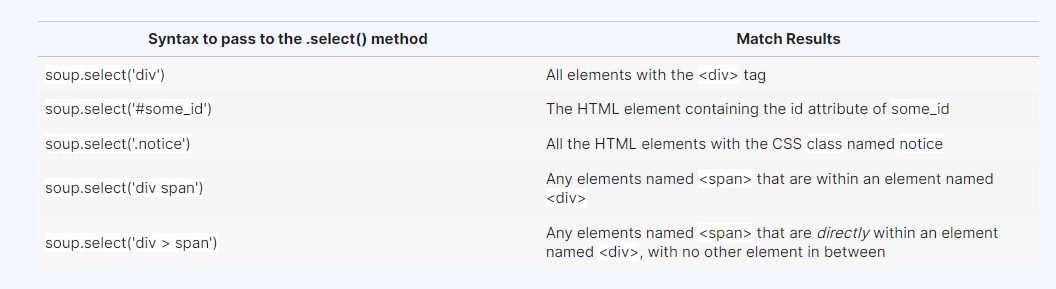

#### Grabbing all elements of a class

In [38]:
response=requests.get("https://en.wikipedia.org/wiki/Enigma_machine")

In [40]:
# Create a soup from request
soup = bs4.BeautifulSoup(response.text,"lxml")

In [44]:
soup.select(".toctext")

[<span class="toctext">History</span>,
 <span class="toctext">Breaking Enigma</span>,
 <span class="toctext">Design</span>,
 <span class="toctext">Electrical pathway</span>,
 <span class="toctext">Rotors</span>,
 <span class="toctext">Stepping</span>,
 <span class="toctext">Turnover</span>,
 <span class="toctext">Entry wheel</span>,
 <span class="toctext">Reflector</span>,
 <span class="toctext">Plugboard</span>,
 <span class="toctext">Accessories</span>,
 <span class="toctext"><i>Schreibmax</i></span>,
 <span class="toctext"><i>Fernlesegerät</i></span>,
 <span class="toctext"><i>Uhr</i></span>,
 <span class="toctext">Mathematical analysis</span>,
 <span class="toctext">Operation</span>,
 <span class="toctext">Basic operation</span>,
 <span class="toctext">Details</span>,
 <span class="toctext">Indicator</span>,
 <span class="toctext">Additional details</span>,
 <span class="toctext">Example enciphering process</span>,
 <span class="toctext">Models</span>,
 <span class="toctext">Commer

In [45]:
for item in soup.select(".toctext"):
    print(item.text)

History
Breaking Enigma
Design
Electrical pathway
Rotors
Stepping
Turnover
Entry wheel
Reflector
Plugboard
Accessories
Schreibmax
Fernlesegerät
Uhr
Mathematical analysis
Operation
Basic operation
Details
Indicator
Additional details
Example enciphering process
Models
Commercial Enigma
Enigma Handelsmaschine (1923)
Die schreibende Enigma (1924)
Die Glühlampenmaschine, Enigma A (1924)
Enigma B (1924)
Enigma C (1926)
Enigma D (1927)
"Navy Cipher D"
Enigma H (1929)
Enigma K
Military Enigma
Funkschlüssel C
Enigma G (1928–1930)
Wehrmacht Enigma I (1930–1938)
M3 (1934)
Two extra rotors (1938)
M4 (1942)
Surviving machines
Derivatives
Simulators
See also
Explanatory notes
References
Citations
General and cited references
Further reading
External links


### Scraping image from a website

In [57]:
res = requests.get("https://en.wikipedia.org/wiki/Extreme_ironing")

In [58]:
soup = bs4.BeautifulSoup(res.text,'lxml')

In [63]:
soup.select(".thumbimage")[0]

<img alt="" class="thumbimage" data-file-height="1280" data-file-width="960" decoding="async" height="293" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/330px-Extermeironingrivelin.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/440px-Extermeironingrivelin.jpg 2x" width="220"/>

In [64]:
our_image=soup.select(".thumbimage")[0]

In [66]:
our_image["src"]

'//upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg'

In [69]:
image_link=requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Extermeironingrivelin.jpg/220px-Extermeironingrivelin.jpg")

In [71]:
file = open("sample_image.png", "wb")
file.write(image_link.content)
file.close()